# AB Test

##  Comparison of AB Test and Conversion of Bidding Methods

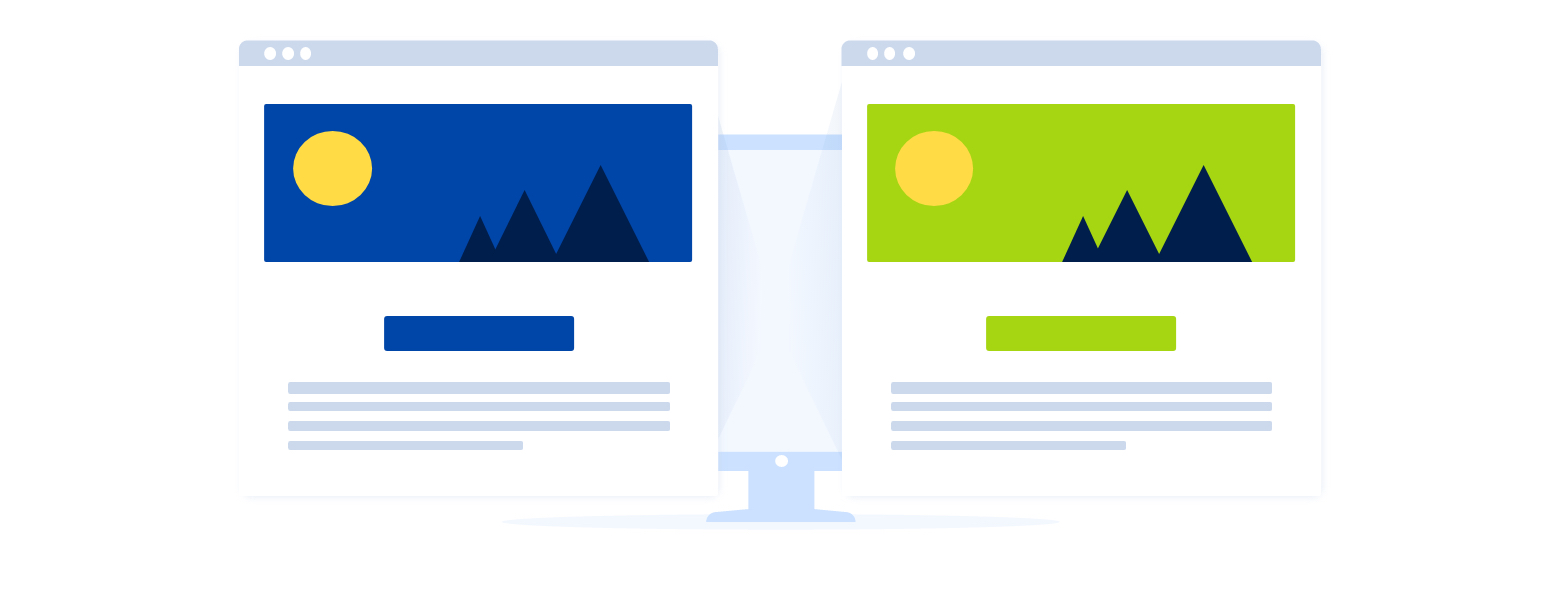

##### Company X has recently introduced a new type of bidding, average bidding, as an alternative to the current type of bidding called maximum bidding.One of our clients, bombabomba.com, decided to test this new feature and wants to do an A/B test to see if average bidding converts more than maximum bidding.

In [1]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install statsmodels
import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, \
    pearsonr, spearmanr, kendalltau, f_oneway, kruskal
from statsmodels.stats.proportion import proportions_ztest

C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Impression : Ad views
### Click      : Number of clicks on the displayed ad
### Purchase   : Number of products purchased after ads clicked
### Earning    : Earnings after purchased products

In [6]:
A_ = pd.read_excel("ab_testing.xlsx",sheet_name="Control Group")
B_ = pd.read_excel("ab_testing.xlsx",sheet_name="Test Group")

In [7]:
A_.head()

,Impression,Click,Purchase,Earning
0,82529.459271,6090.077317,665.211255,2311.277143
1,98050.451926,3382.861786,315.084895,1742.806855
2,82696.023549,4167.965750,458.083738,1797.827447
3,109914.400398,4910.882240,487.090773,1696.229178
4,108457.762630,5987.655811,441.034050,1543.720179


In [9]:
A_.describe().T

,count,mean,std,min,25%,50%,75%,max
Impression,40.0,101711.449068,20302.157862,45475.942965,85726.690349,99790.701078,115212.816543,147539.336329
Click,40.0,5100.657373,1329.985498,2189.753157,4124.304129,5001.220602,5923.803596,7959.125069
Purchase,40.0,550.894059,134.108201,267.028943,470.095533,531.206307,637.957088,801.795020
Earning,40.0,1908.568300,302.917783,1253.989525,1685.847205,1975.160522,2119.802784,2497.295218


In [8]:
B_.head()

,Impression,Click,Purchase,Earning
0,120103.503796,3216.547958,702.160346,1939.611243
1,134775.943363,3635.082422,834.054286,2929.405820
2,107806.620788,3057.143560,422.934258,2526.244877
3,116445.275526,4650.473911,429.033535,2281.428574
4,145082.516838,5201.387724,749.860442,2781.697521


In [10]:
B_.describe().T

,count,mean,std,min,25%,50%,75%,max
Impression,40.0,120512.411758,18807.448712,79033.834921,112691.970770,119291.300775,132050.578933,158605.920483
Click,40.0,3967.549761,923.095073,1836.629861,3376.819024,3931.359804,4660.497911,6019.695079
Purchase,40.0,582.106097,161.152513,311.629515,444.626828,551.355732,699.862360,889.910460
Earning,40.0,2514.890733,282.730852,1939.611243,2280.537426,2544.666107,2761.545405,3171.489708


In [13]:
A_.columns = [i+"_A" for i in A_.columns]
B_.columns = [i+"_B" for i in B_.columns]

In [15]:
df = pd.concat([A_, B_], axis=1)

In [16]:
df.head()

,Impression_A,Click_A,Purchase_A,Earning_A,Impression_B,Click_B,Purchase_B,Earning_B
0,82529.459271,6090.077317,665.211255,2311.277143,120103.503796,3216.547958,702.160346,1939.611243
1,98050.451926,3382.861786,315.084895,1742.806855,134775.943363,3635.082422,834.054286,2929.405820
2,82696.023549,4167.965750,458.083738,1797.827447,107806.620788,3057.143560,422.934258,2526.244877
3,109914.400398,4910.882240,487.090773,1696.229178,116445.275526,4650.473911,429.033535,2281.428574
4,108457.762630,5987.655811,441.034050,1543.720179,145082.516838,5201.387724,749.860442,2781.697521


In [17]:
df.isnull().sum()

Impression_A    0
Click_A         0
Purchase_A      0
Earning_A       0
Impression_B    0
Click_B         0
Purchase_B      0
Earning_B       0
dtype: int64

## Let's define a hypothesis :
Is there a statistical difference between the gains between the Control group and the Test group?
#### H0:  M1 = M2  No difference
#### H1:  M1 != M2 There is a difference

In [18]:
df["Purchase_A"].mean()

550.8940587702316

In [19]:
df["Purchase_B"].mean()

582.1060966484675

### Normality Assumption 
### H0: There is no statistically significant difference between the sample distribution and the theoretical distribution.
### H1:There is a statistically significant difference between the sample distribution and the theoretical distribution

###  p-value < 0.05  H0 rejected , Normal distribution assumption is not provided.
###  p-value > 0.05  H0 not rejected,the assumption of normal distribution is provided.

#### For the control group ; p-value > 0.05 

In [30]:
test_st , p_value = shapiro(B_["Purchase_B"])
print('Test statistic = %.4f, P-Value = %.4f' % (test_st, p_value))

Test statistic = 0.9589, P-Value = 0.1541


#### For the Test group ; p-value > 0.05 

In [31]:
test_st , p_value = shapiro(A_["Purchase_A"])
print('Test statistic = %.4f, P-Value = %.4f' % (test_st, p_value))

Test statistic = 0.9773, P-Value = 0.5891


###### As a result, the assumption of normality was provided for the Test and Control groups.

### Variance homogeneity
### p-value > 0.05 - H0 rejected ,The variance assumption is provided.
### p-value < 0.05 - H0 not rejected , Assumption of variance cannot be provided.

In [32]:
test_st, p_value = levene(df["Purchase_A"],df["Purchase_B"])
print('Test statistic = %.4f, p-Value = %.4f' %(test_st, p_value))

Test statistic = 2.6393, p-Value = 0.1083


###### H0 cannot be rejected. Assumption of variance provided . p-value > 0.05

### Parametric Test

In [34]:
test_st, p_value = ttest_ind(df["Purchase_A"], df["Purchase_B"], equal_var=True)
print('tvalue = %.4f, pvalue = %.4f' %(test_st, p_value))


tvalue = -0.9416, pvalue = 0.3493


###### P-value > 0.05 H0 hypothesis cannot be rejected because. That is, there is no statistically significant difference between the gains between the Control group and the Test group. It may have happened by chance.


#### 1. Assumption Check¶
    1- Normality Assumption
    2- Variance Homogeneity
#### 2. Implementation of the Hypothesis
    1- Independent two-sample t-test (parametric test) if assumptions are met.
    2- Mannwhitneyu test if assumptions are not met (non-parametric test).